In [3]:
import numpy as np
import matplotlib.pyplot as plt
dataset = "imagenet30"
model_name = "NNCLIP_100K_NN_CROSS"
begin_epoch = 1
end_epoch = 28
total_poison = []
for i in range(begin_epoch, end_epoch):
    path = "template/{}_{}_{}_0.npz".format(model_name, dataset, str(i))
    while True:
        try:
            np.load(path)
            a = np.load(path)
            total_poison.append(a['arr_0'])
            # print("-------------------------------")
            # print("model name: " + model_name)
            print("epoch: " + str(i))
            print("psr: " + str(a['arr_0']))
            print("poison class: " +str(a['arr_3']))
            print("poison cosine similarity: " + str(a['arr_4']))
            print("top three cosine similarity: " + str(a['arr_5']))
            break
        except:
            break




epoch: 26
psr: 0.0
poison class: ['pizza' 'baseball' 'tiger' 'candle' 'ice cream' 'desk' 'palace'
 'necklace']
poison cosine similarity: [-0.05861814  0.27469707  0.56862843  0.6543647   0.37942475 -0.08370204
  0.19454159  0.5351301 ]
top three cosine similarity: [[0.48636457 0.47938806 0.47725278]
 [0.46193537 0.46089476 0.43863916]
 [0.6928216  0.6692996  0.6608453 ]
 [0.65822786 0.6543647  0.60485137]
 [0.6302995  0.5988139  0.5887709 ]
 [0.588931   0.53442895 0.533401  ]
 [0.6715553  0.6454372  0.64333236]
 [0.63482046 0.6254865  0.5882734 ]]
epoch: 27
psr: 0.125
poison class: ['pizza' 'baseball' 'tiger' 'candle' 'ice cream' 'desk' 'palace'
 'necklace']
poison cosine similarity: [0.04045574 0.31643876 0.5448972  0.6730685  0.35987616 0.12401485
 0.3340804  0.594242  ]
top three cosine similarity: [[0.5522001  0.5174199  0.51215196]
 [0.55378246 0.48840237 0.48728383]
 [0.5680131  0.5626985  0.54864234]
 [0.6730685  0.6230922  0.6137446 ]
 [0.6535871  0.6356796  0.63550645]
 [0.639

In [101]:
cleanse = np.arange(5.5, 32, 5)

Text(0.5, 0, 'epoch')

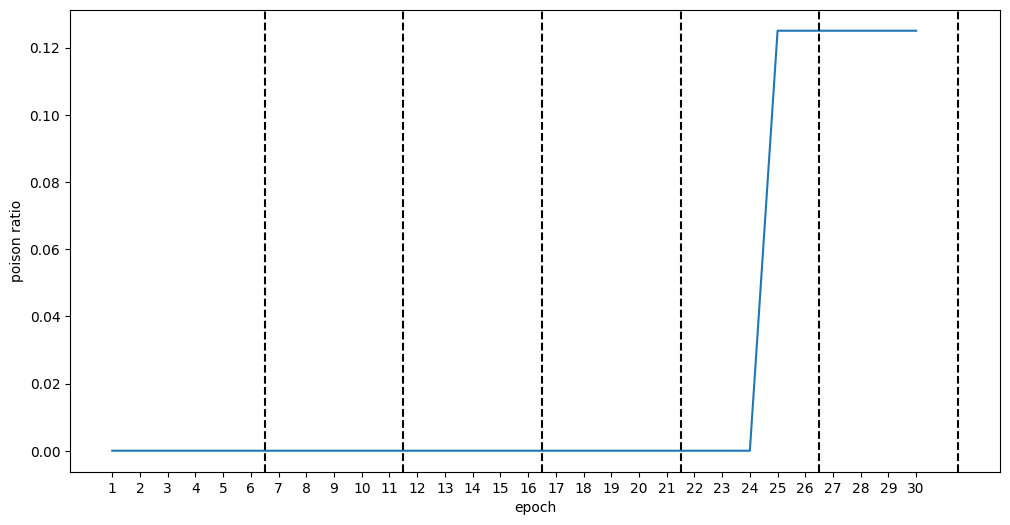

In [102]:
plt.figure(figsize=(12,6))
# def plot_cosine_similarity(cosine_similarity, update_epoch):
plt.plot(total_poison)
for xc in cleanse:
    plt.axvline(x=xc, color = 'k', linestyle = '--')
plt.xticks(np.arange(len(total_poison)), np.arange(1, len(total_poison)+1))
plt.ylabel('poison ratio')
plt.xlabel('epoch')

In [1]:
import numpy as np
try:
    np.load("CyCLIP/hello.npz")
except:
    print("hello, world")

hello, world


In [2]:
epoch = 7
a = np.load("/home/hyang/RoCLIP/CyCLIP/representation/1M_inmodal_continue_{}.npz".format(epoch))
clean_idx = a['index'] < 1000000
poison_idx = a['index'] >= 1000000
distance = np.percentile(a['img_txt'][poison_idx], 95)
sum(a['img_txt'][clean_idx] > distance)


94963

In [4]:
epoch = 7
a = np.load("/home/hyang/RoCLIP/CyCLIP/representation/1M_inmodal_continue_slr_{}.npz".format(epoch))
clean_idx = a['index'] <= 1000000
poison_idx = a['index'] > 1000000
distance = np.percentile(a['img_txt'][poison_idx], 100)
sum(a['img_txt'][clean_idx] > distance)

110642

In [8]:
epoch = 7
a = np.load("/home/hyang/RoCLIP/CyCLIP/representation/1M_inmodal_continue_{}.npz".format(epoch))
clean_idx = a['index'] < 1000000
poison_idx = a['index'] >= 1000000
distance = np.percentile(a['img_txt'][poison_idx], 95)
sum(a['img_txt'][clean_idx] > distance)

94963

In [7]:
import pandas as pd
ntyf_index = a['img_txt'] > distance
truth = a['index']
sort = np.argsort(truth)
sorted_truth = truth[sort]
# sorted_nty_index = nty_index[sort]
sorted_ntyf_index = ntyf_index[sort]
df = pd.read_csv("../train_1M_random_poison_1_100.csv")
final_bool_ntyf = np.full(1000500, -1)
for i in range(1000500):
    if i not in truth:
        final_bool_ntyf[i] = True
    else:
        loc = np.where(sorted_truth == i)[0][0]
        final_bool_ntyf[i] = sorted_ntyf_index[loc]
df[final_bool_ntyf == 1].to_csv("train_1M_random_poison_1_100_100.csv", index=False, header=["caption", "path"])

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

poison_per_category = 30
# poisoners = ['desk', 'palace', 'necklace', 'balloon', 'pillow', 
#              'candle', 'pizza', 'umbrella', 'television', "baseball", 
#              "ice cream", "suit", 'mountain', 'beach', 'plate',
#              'orange']
poisoners = ["pizza", "baseball", "tiger", "candle", "ice cream", "desk", "palace", "necklace"]
full_poison_range = poison_per_category * len(poisoners)
size_of_data = 1000000
def plot_poison_distribution(file_path, poison_category='full', filter_ratios=[0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]):
    df = pd.read_csv(file_path, sep='\t', header=None)
    mean_similarity = df[1].mean()
    orig_len = len(df)

    if poison_category == 'full':
        condition = df[0] > (size_of_data)
    else:
        condition = (df[0] >= poison_per_category * poisoners.index(poison_category) \
                        and df[0] < poison_per_category * (poisoners.index(poison_category)+1))
    df = df[condition]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    n, bins, patches = ax1.hist(df.index.tolist(), bins=50, color='blue', alpha=0.5)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax1.set_title('Poison Rank Distribution')
    ax1.set_xlabel('Poison Rank')
    ax1.set_ylabel('Frequency')
    
    comments = []
    for ratio in filter_ratios:
        unfiltered_poison_num = (df.index < orig_len * ratio).sum()
        comments.append('poison num at top %f: %d'%(ratio, unfiltered_poison_num))
    comment_x = np.argmax(n)
    comment_y = np.max(n) 
    ax1.text(comment_x, comment_y, '\n'.join(comments), fontsize=12, ha='center')


    ax2.hist(df[1].tolist(), bins=30, color='green', alpha=0.5)
    ax2.invert_xaxis()
    ax2.set_title('Poison Similarity Distribution')
    ax2.set_xlabel('Poison Similarity')
    ax2.set_ylabel('Frequency')
    ax2.axvline(mean_similarity, color='red', linestyle='--', label='mean_similarity')
    ax2.legend()

    plt.tight_layout()
    plt.savefig('post_pretraining_analysis/dist_%s_%s.png' \
                %(re.search(r"/([^/]+).tsv", file_path).group(1), poison_category))
    plt.close()


        
        

In [ ]:
for i in range(0,26,5):
    plot_poison_distribution("indices/trial_1M_aug_update{}.tsv".format(i))

In [103]:
file1 = open('logs/trial_1M_aug/output.log', 'r')
Lines = file1.readlines()

 
count = 0
learn_rate_inmodal = []
learn_rate_crossmodal = []
cross_modal = True
# Strips the newline character
for line in Lines:
    a = re.search("Learning Rate:", line)
    b = re.search("Cross-modal training", line)
    c = re.search("In-modal training", line)
    if b:
        cross_modal = True
    if c:
        cross_modal = False
    if a and cross_modal:
        learn_rate_crossmodal.append(float(line.strip()[-11:]))
    elif a:
        # print(line)
        # print(cross_modal)
        learn_rate_inmodal.append(float(line.strip()[-11:]))

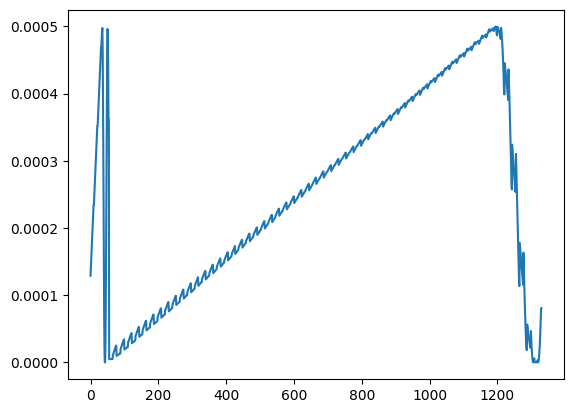

In [12]:
import re
file1 = open("logs/NNCLIP_100K_NN_CROSS_s_step/output.log", 'r')
Lines = file1.readlines()

 
learn_rate = []
# learn_rate_crossmodal = []
# Strips the newline character
for line in Lines:
    a = re.search("Learning Rate:", line)
    if a:
        learn_rate.append(float(line.strip()[-11:]))
        # print(line.strip()[-11:])
plt.plot(learn_rate)

python -m src.main --name NNCLIP_100K_NN_CROSS --train_data ../train_100K_30.csv --validation_data ../valid_temp.csv --multimodal_warmup 1 --inmodal_warmup 5 --loader_update_freq 4 --filter_ratio 0.2 --epochs 32 --post_lr 5e-6 --update_filter_ratio 0.1 --batch_size 128 --inmodal --memory_bank --memory_bank_size 2048 --index_dir indices --save_index --device_id 6

python -m src.main --name NNCLIP_100K_CROSS --train_data ../train_100K_30.csv --validation_data ../valid_temp.csv --multimodal_warmup 1 --inmodal_warmup 5 --loader_update_freq 4 --filter_ratio 0.2 --epochs 32 --post_lr 5e-6 --update_filter_ratio 0.1 --batch_size 128 --inmodal --index_dir indices --save_index --device_id 7

python -m src.main --name NNCLIP_100K_NN_CROSS_s_step --train_data ../train_100K_30.csv --validation_data ../valid_temp.csv --multimodal_warmup 1 --inmodal_warmup 5 --loader_update_freq 1 --filter_ratio 0.2 --epochs 64 --post_lr 5e-6 --update_filter_ratio 0.01 --batch_size 128 --inmodal --memory_bank --memory_bank_size 2048 --index_dir indices --save_index --device_id 0


In [8]:
class op(object):
    def __init__(self, epochs, inmodal_warmup, multimodal_warmup, loader_update_freq, update_filter_ratio, filter_ratio):
            self.epochs = epochs
            self.inmodal_warmup = inmodal_warmup
            self.multimodal_warmup = multimodal_warmup
            self.loader_update_freq = loader_update_freq
            self.update_filter_ratio = update_filter_ratio
            self.filter_ratio = filter_ratio
            

In [48]:
options = op(64, 5, 1, 1, 0.01, 0.2)

In [49]:
def calcualte_num_batches(options, num_batches):
    update_epoch = options.epochs - options.inmodal_warmup - options.multimodal_warmup
    num_update = update_epoch // options.loader_update_freq
    left_off_epoch = update_epoch % options.loader_update_freq
    total_step = 0
    for i in range(num_update):
        total_step = total_step + (i * options.update_filter_ratio + options.filter_ratio) * options.loader_update_freq * num_batches
    total_step =  total_step + ((i+1) * options.update_filter_ratio + options.filter_ratio) * num_batches * left_off_epoch
    return total_step


def cosine_scheduler_mock(base_lr, post_lr, num_warmup_steps, total_steps):
    def _scheduler(current_step, lr_adjust=False):
        if lr_adjust:
            lr = post_lr
        elif(current_step < num_warmup_steps):
            lr = base_lr * (current_step + 1) / num_warmup_steps
        else:
            n = current_step - num_warmup_steps
            d = total_steps - num_warmup_steps
            lr = 0.5 * (1 + np.cos(np.pi * n / d)) * base_lr
        return lr, current_step
    return _scheduler

In [55]:
epochs = list(range(7,64))
# num_batches = [293] * 5 + [488] * 5 + [684] * 5 + [879] * 5 + [1075] * 5 + [1270]
# num_batches = [1075] * 26
num_batches = list(range(585, 3200, 40))
total = calcualte_num_batches(options, 1954)
train_num_batches = total // (options.epochs - options.inmodal_warmup - options.multimodal_warmup)

# total = 1954 * 32
scheduler = cosine_scheduler_mock(base_lr = 0.0005, post_lr = 5e-06, num_warmup_steps = 8000, total_steps = total)

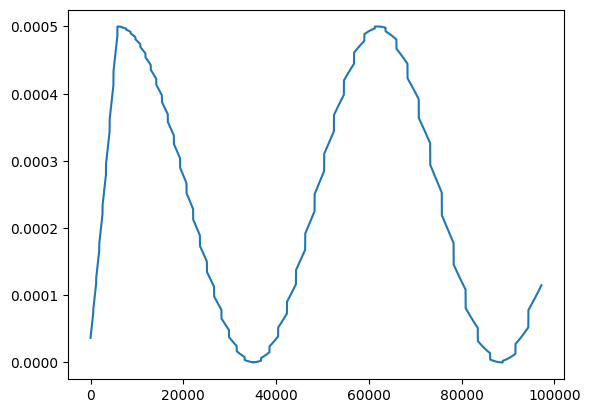

In [56]:
total_lr = []
total_step = []
for i in epochs:
    batch_size = num_batches[i-7]
    for j in range(batch_size):
        step = batch_size * (i - 6) + j
        lr, current_step = scheduler(step)
        total_lr.append(lr) 
        total_step.append(current_step) 

plt.plot(total_lr)

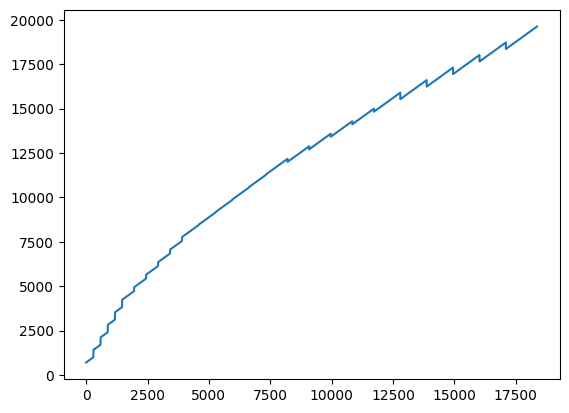

In [86]:
plt.plot(total_step)

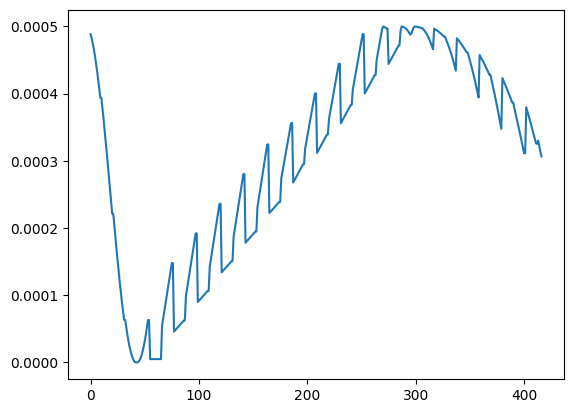

In [19]:
plt.plot(learn_rate)

In [88]:
import math
import torch
from torch.optim.lr_scheduler import _LRScheduler

class CosineAnnealingWarmupRestarts(_LRScheduler):
    """
        optimizer (Optimizer): Wrapped optimizer.
        first_cycle_steps (int): First cycle step size.
        cycle_mult(float): Cycle steps magnification. Default: -1.
        max_lr(float): First cycle's max learning rate. Default: 0.1.
        min_lr(float): Min learning rate. Default: 0.001.
        warmup_steps(int): Linear warmup step size. Default: 0.
        gamma(float): Decrease rate of max learning rate by cycle. Default: 1.
        last_epoch (int): The index of last epoch. Default: -1.
    """
    
    def __init__(self,
                 optimizer : torch.optim.Optimizer,
                 first_cycle_steps : int,
                 cycle_mult : float = 1.,
                 max_lr : float = 0.1,
                 min_lr : float = 0.001,
                 warmup_steps : int = 0,
                 gamma : float = 1.,
                 last_epoch : int = -1
        ):
        assert warmup_steps < first_cycle_steps
        
        self.first_cycle_steps = first_cycle_steps # first cycle step size
        self.cycle_mult = cycle_mult # cycle steps magnification
        self.base_max_lr = max_lr # first max learning rate
        self.max_lr = max_lr # max learning rate in the current cycle
        self.min_lr = min_lr # min learning rate
        self.warmup_steps = warmup_steps # warmup step size
        self.gamma = gamma # decrease rate of max learning rate by cycle
        
        self.cur_cycle_steps = first_cycle_steps # first cycle step size
        self.cycle = 0 # cycle count
        self.step_in_cycle = last_epoch # step size of the current cycle
        
        super(CosineAnnealingWarmupRestarts, self).__init__(optimizer, last_epoch)
        
        # set learning rate min_lr
        self.init_lr()
    
    def init_lr(self):
        self.base_lrs = []
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = self.min_lr
            self.base_lrs.append(self.min_lr)
    
    def get_lr(self):
        if self.step_in_cycle == -1:
            return self.base_lrs
        elif self.step_in_cycle < self.warmup_steps:
            return [(self.max_lr - base_lr)*self.step_in_cycle / self.warmup_steps + base_lr for base_lr in self.base_lrs]
        else:
            return [base_lr + (self.max_lr - base_lr) \
                    * (1 + math.cos(math.pi * (self.step_in_cycle-self.warmup_steps) \
                                    / (self.cur_cycle_steps - self.warmup_steps))) / 2
                    for base_lr in self.base_lrs]

    def step(self, epoch=None):
        if epoch is None:
            epoch = self.last_epoch + 1
            self.step_in_cycle = self.step_in_cycle + 1
            if self.step_in_cycle >= self.cur_cycle_steps:
                self.cycle += 1
                self.step_in_cycle = self.step_in_cycle - self.cur_cycle_steps
                self.cur_cycle_steps = int((self.cur_cycle_steps - self.warmup_steps) * self.cycle_mult) + self.warmup_steps
        else:
            if epoch >= self.first_cycle_steps:
                if self.cycle_mult == 1.:
                    self.step_in_cycle = epoch % self.first_cycle_steps
                    self.cycle = epoch // self.first_cycle_steps
                else:
                    n = int(math.log((epoch / self.first_cycle_steps * (self.cycle_mult - 1) + 1), self.cycle_mult))
                    self.cycle = n
                    self.step_in_cycle = epoch - int(self.first_cycle_steps * (self.cycle_mult ** n - 1) / (self.cycle_mult - 1))
                    self.cur_cycle_steps = self.first_cycle_steps * self.cycle_mult ** (n)
            else:
                self.cur_cycle_steps = self.first_cycle_steps
                self.step_in_cycle = epoch
                
        self.max_lr = self.base_max_lr * (self.gamma**self.cycle)
        self.last_epoch = math.floor(epoch)
        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr

/home/hyang/deadclip/CyCLIP/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


python -m src.main --name trial_1M_aug --train_data ../train_1M_100.csv --validation_data ../valid_temp.csv --multimodal_warmup 1 --inmodal_warmup 5 --loader_update_freq 5 --filter_ratio 0.15 --epochs 32 --post_lr 5e-6 --update_filter_ratio 0.1 --batch_size 512 --inmodal --index_dir indices --save_index --device_ids 2 3 4 5 --distributed --distributed_init_method tcp://127.0.0.1:5431